In [ ]:
%cd /content
!git clone https://github.com/gkibria121/ai-pipeline.git
%cd ai-pipeline
!git pull

/content
fatal: destination path 'ai-pipeline' already exists and is not an empty directory.
/content/ai-pipeline
Already up to date.


In [ ]:
!python download_dataset.py

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python main.py   --config ./config/SimpleCNN.conf 

2025-12-08 04:48:43.486843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765169323.507553   13517 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765169323.513632   13517 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765169323.530585   13517 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765169323.530615   13517 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765169323.530621   13517 computation_placer.cc:177] computation placer alr

In [ ]:
!python main.py --eval --config ./config/SimpleCNN.conf   --eval_model_weights ./exp_result/LA_SimpleCNN_ep10_bs24/weights/best.pth

2025-12-08 04:42:46.169092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765168966.189205   12044 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765168966.195181   12044 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765168966.210303   12044 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765168966.210328   12044 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765168966.210331   12044 computation_placer.cc:177] computation placer alr

✓ Loaded roc_curve.png
✓ Loaded confusion_matrix.png
✓ Loaded score_distribution.png
✓ Loaded metrics_comparison.png
✓ Loaded det_curve.png


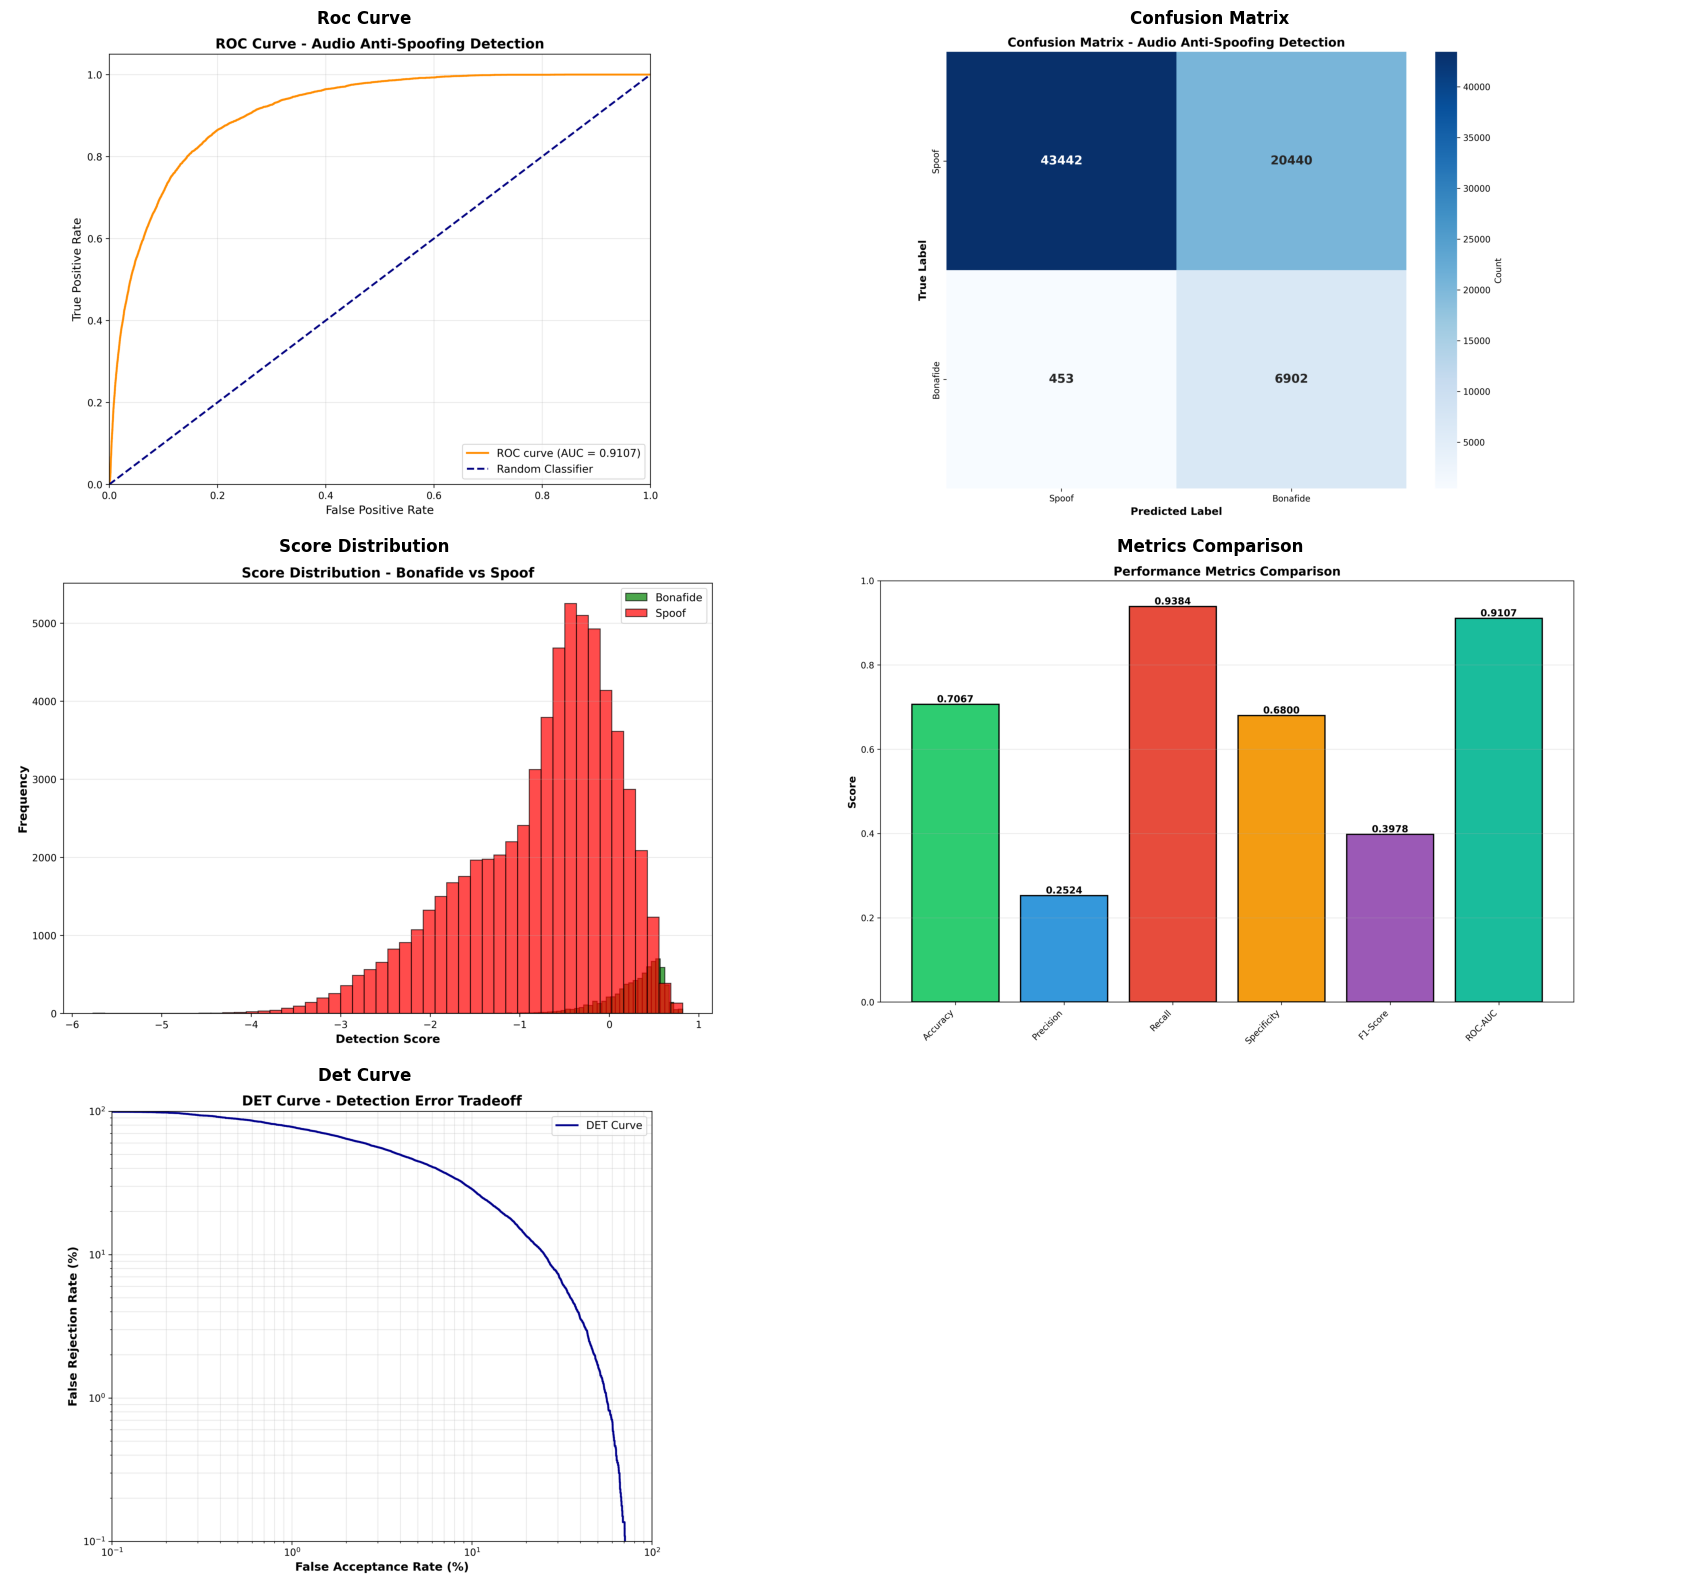


✓ All plots displayed successfully!


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

# Path to the plots directory
plots_dir = Path("./exp_result/LA_SimpleCNN_ep10_bs24/plots")

# List of plot files to display
plot_files = [
    "roc_curve.png",
    "confusion_matrix.png",
    "score_distribution.png",
    "metrics_comparison.png",
    "det_curve.png"
]

# Display all plots
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
axes = axes.flatten()

for idx, plot_file in enumerate(plot_files):
    plot_path = plots_dir / plot_file
    if plot_path.exists():
        img = mpimg.imread(plot_path)
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(plot_file.replace('.png', '').replace('_', ' ').title(), 
                           fontsize=12, fontweight='bold')
        print(f"✓ Loaded {plot_file}")
    else:
        print(f"✗ File not found: {plot_path}")

# Hide the extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig("./all_plots_combined.png", dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ All plots displayed successfully!")

In [ ]:
# Display plots individually for better viewing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

plots_dir = Path("./exp_result/LA_SimpleCNN_ep10_bs24/plots")

plot_files = {
    "ROC Curve": "roc_curve.png",
    "Confusion Matrix": "confusion_matrix.png",
    "Score Distribution": "score_distribution.png",
    "Metrics Comparison": "metrics_comparison.png",
    "DET Curve": "det_curve.png"
}

for title, filename in plot_files.items():
    plot_path = plots_dir / filename
    if plot_path.exists():
        plt.figure(figsize=(12, 8))
        img = mpimg.imread(plot_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title, fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        print(f"✓ {title} displayed")
    else:
        print(f"✗ {filename} not found at {plot_path}")

In [ ]:
# Display results summary and model info
import json
from pathlib import Path

results_dir = Path("./exp_result/LA_SimpleCNN_ep10_bs24")

# Read evaluation metrics
metrics_file = results_dir / "loaded_model_t-DCF_EER.txt"
if metrics_file.exists():
    print("=" * 70)
    print("EVALUATION RESULTS SUMMARY")
    print("=" * 70)
    with open(metrics_file, 'r') as f:
        print(f.read())

# List all files in results directory
print("\n" + "=" * 70)
print("FILES IN RESULTS DIRECTORY")
print("=" * 70)
import os
for root, dirs, files in os.walk(results_dir):
    level = root.replace(str(results_dir), '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        print(f'{subindent}{file}')